<a href="https://colab.research.google.com/github/Nhung-Nguyen86/DataScience/blob/main/Prostate_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [ ]:
os.chdir(r'C:\Users\nguye\OneDrive\Desktop\Chapman\Spring 2024\Data Mining_CS530\Homework 1')

In [ ]:
os.listdir()

['.ipynb_checkpoints',
 'Assignment 1.pdf',
 'Prostate Cancer.txt',
 'Prostate_Cancer.pdf',
 'Prostate_Cancer_Nina (2).ipynb']

In [ ]:
df = pd.read_csv('Prostate Cancer.txt')
target = 'lpsa'
features = ['lcavol', 'lweight', 'age', 'lbph',
            'svi', 'lcp', 'gleason', 'pgg45']

In [ ]:
df.head()

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


C:\Users\nguye\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


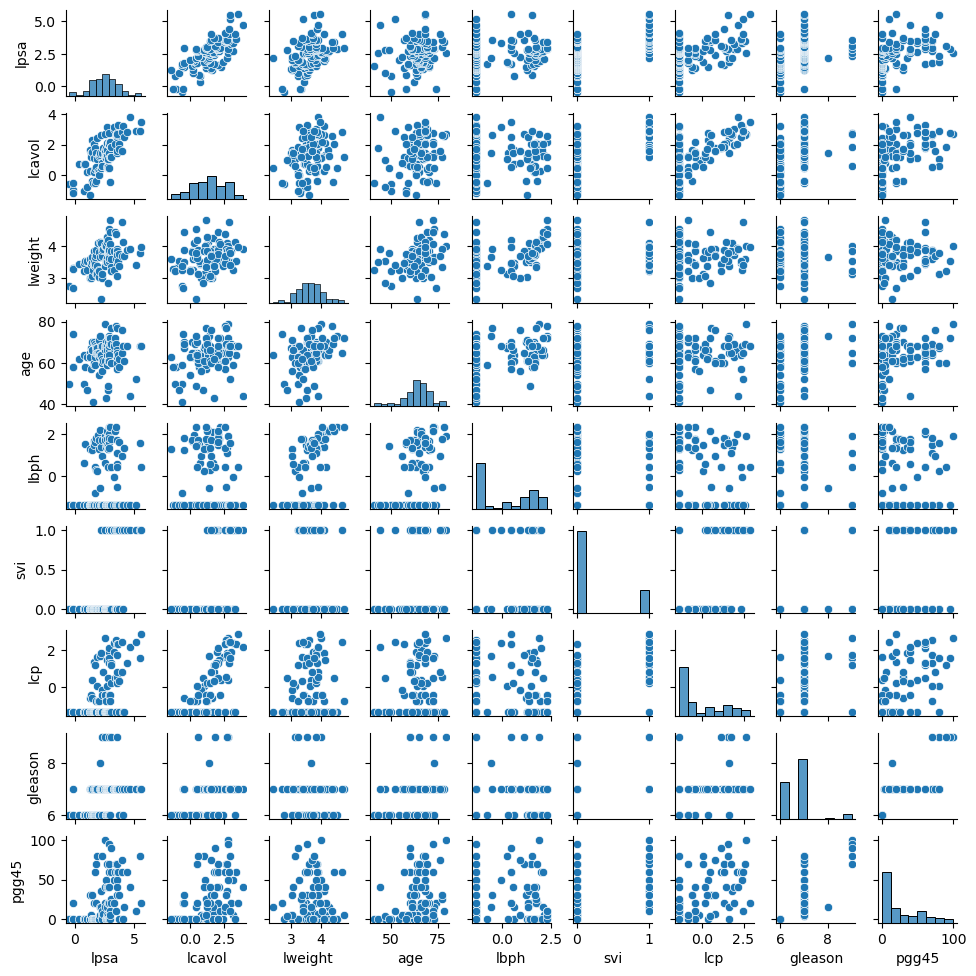

In [ ]:
sns.pairplot(df, vars=[target]+features, kind="scatter", height=1.1)

In [ ]:
is_train = df.train == 'T'

X, y = df[features].values, df[target].values

X_train, y_train = X[is_train], y[is_train]

X_test, y_test = X[~is_train], y[~is_train]

In [ ]:
df[is_train][features].corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.300232,0.286324,0.063168,0.592949,0.692043,0.426414,0.483161
lweight,0.300232,1.000000,0.316723,0.437042,0.181054,0.156829,0.023558,0.074166
age,0.286324,0.316723,1.000000,0.287346,0.128902,0.172951,0.365915,0.275806
lbph,0.063168,0.437042,0.287346,1.000000,-0.139147,-0.088535,0.032992,-0.030404
svi,0.592949,0.181054,0.128902,-0.139147,1.000000,0.671240,0.306875,0.481358
lcp,0.692043,0.156829,0.172951,-0.088535,0.671240,1.000000,0.476437,0.662533
gleason,0.426414,0.023558,0.365915,0.032992,0.306875,0.476437,1.000000,0.757056
pgg45,0.483161,0.074166,0.275806,-0.030404,0.481358,0.662533,0.757056,1.000000


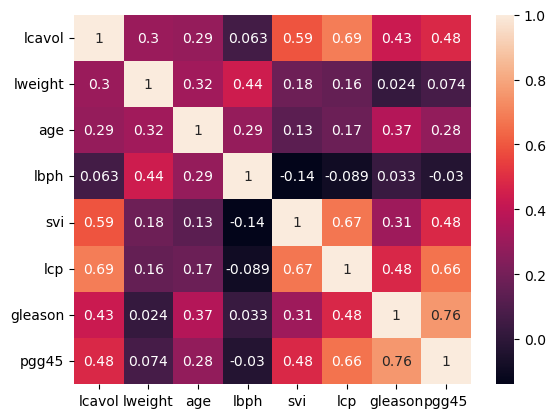

In [ ]:
matrix = df[is_train][features].corr()
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
scaler = StandardScaler().fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
ls = sm.OLS(y_train, sm.add_constant(X_train)).fit()
ls_params = ls.params

In [ ]:
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     16.47
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           2.04e-12
Time:                        17:36:01   Log-Likelihood:                -67.505
No. Observations:                  67   AIC:                             153.0
Df Residuals:                      58   BIC:                             172.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4649      0.089     27.598      0.0